<a href="https://colab.research.google.com/github/prachi735/EVA5/blob/main/Session7/EVA5_S7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import files from github

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd EVA5
! git clone https://github.com/prachi735/EVA5
%cd EVA5
!git pull

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/EVA5
fatal: destination path 'EVA5' already exists and is not an empty directory.
/content/EVA5/EVA5
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 4 (delta 3), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (4/4), done.
From https://github.com/prachi735/EVA5
   2f879f4..a85f3bc  main       -> origin/main
Updating 2f879f4..a85f3bc
Fast-forward
 Session7/model.py | 6 +++---
 1 file changed, 3 insertions(+), 3 deletions(-)


In [2]:
from Session7.dataset import *
from Session7.utils import *
from Session7.model import *
from Session7.test import *
from Session7.train import *

from torchsummary import summary


%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
dataset_name = 'CIFAR10'
in_channels = 3
#dataset_name = 'MNIST'
#in_channels = 1

In [4]:
temp_train, _ = get_dataset(dataset_name)

Files already downloaded and verified
Files already downloaded and verified


In [5]:
data_stats = get_data_stats(torch.tensor(temp_train.data))
print(data_stats['mean'],data_stats['std'])

tensor(120.7076) tensor(64.1501)


In [6]:
train_transforms,test_transforms = get_transforms(data_stats['mean'],data_stats['std'])

In [7]:
train_data, test_data = get_dataset(dataset_name,train_transforms,test_transforms)

Files already downloaded and verified
Files already downloaded and verified


In [8]:
device = get_device()
device

CUDA Available? True


device(type='cuda')

In [28]:
# dataloader arguments
dataloader_args = dict(shuffle = True, batch_size = 64, num_workers = 4,pin_memory = True) if device.type == 'cuda' else dict(shuffle = True, batch_size = 64)
train_dataloader,test_dataloader = get_dataloader(train_data, test_data, **dataloader_args)

torch.Size([64, 3, 32, 32])
torch.Size([64])


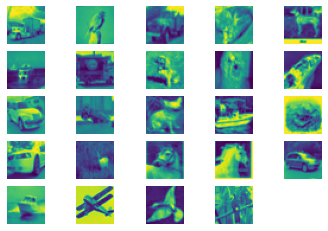

In [29]:
dataiter = iter(train_dataloader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

figure = plt.figure()
num_of_images = 24
for index in range(1, num_of_images + 1):
    plt.subplot(5, 5, index)
    plt.axis('off')
    plt.imshow(images[index][0])

In [30]:
# get model summary 
model = Net(is_GBN=True, gbn_splits=2, in_c = in_channels,n1=32,n2=64,n3=256,n4=512).to(device)
print(summary(model, input_size=(3,32,32)))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
              ReLU-2           [-1, 32, 32, 32]               0
    GhostBatchNorm-3           [-1, 32, 32, 32]              64
            Conv2d-4           [-1, 32, 32, 32]           9,216
              ReLU-5           [-1, 32, 32, 32]               0
    GhostBatchNorm-6           [-1, 32, 32, 32]              64
         MaxPool2d-7           [-1, 32, 16, 16]               0
            Conv2d-8           [-1, 64, 16, 16]          18,432
              ReLU-9           [-1, 64, 16, 16]               0
   GhostBatchNorm-10           [-1, 64, 16, 16]             128
           Conv2d-11           [-1, 64, 16, 16]          36,864
             ReLU-12           [-1, 64, 16, 16]               0
   GhostBatchNorm-13           [-1, 64, 16, 16]             128
        MaxPool2d-14             [-1, 6

In [31]:
EPOCHS=20
is_L1_loss = 0
is_GBN = True
gbn_splits = 4
model = Net(is_GBN=True, gbn_splits=2, in_c = in_channels,n1=16,n2=32,n3=128,n4=256,grp=64).to(device)
optimizer = get_optimizer(model.parameters(),"L2")

In [32]:
train_losses = []
train_acc = []
test_losses = []
test_acc = []

for epoch in range(EPOCHS):
    print("EPOCH:", epoch+1)
    train(model, device, train_dataloader, optimizer, epoch,train_losses, train_acc, is_L1_loss, lamda_l1=0.0001)
    test(model, device, test_dataloader, test_losses, test_acc)

  0%|          | 0/782 [00:00<?, ?it/s]

EPOCH: 1


Loss=1.6815102100372314 Batch_id=781 Accuracy=29.34: 100%|██████████| 782/782 [00:16<00:00, 46.10it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 13.5699, Accuracy: 1000/10000 (10.00%)

EPOCH: 2


Loss=1.0974986553192139 Batch_id=781 Accuracy=41.95: 100%|██████████| 782/782 [00:16<00:00, 46.63it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 3.1866, Accuracy: 1020/10000 (10.20%)

EPOCH: 3


Loss=1.7384246587753296 Batch_id=781 Accuracy=49.08: 100%|██████████| 782/782 [00:16<00:00, 46.39it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 7.9257, Accuracy: 1000/10000 (10.00%)

EPOCH: 4


Loss=1.549537181854248 Batch_id=781 Accuracy=54.34: 100%|██████████| 782/782 [00:17<00:00, 45.71it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 7.9803, Accuracy: 902/10000 (9.02%)

EPOCH: 5


Loss=1.0411503314971924 Batch_id=781 Accuracy=58.42: 100%|██████████| 782/782 [00:16<00:00, 46.34it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 5.3151, Accuracy: 1160/10000 (11.60%)

EPOCH: 6


Loss=1.2520430088043213 Batch_id=781 Accuracy=61.37: 100%|██████████| 782/782 [00:16<00:00, 46.08it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 17.6179, Accuracy: 1000/10000 (10.00%)

EPOCH: 7


Loss=1.08144211769104 Batch_id=781 Accuracy=63.70: 100%|██████████| 782/782 [00:17<00:00, 45.88it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 5.1417, Accuracy: 1007/10000 (10.07%)

EPOCH: 8


Loss=1.1550309658050537 Batch_id=781 Accuracy=66.02: 100%|██████████| 782/782 [00:17<00:00, 45.80it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 5.1361, Accuracy: 1009/10000 (10.09%)

EPOCH: 9


Loss=1.2454540729522705 Batch_id=781 Accuracy=67.91: 100%|██████████| 782/782 [00:16<00:00, 46.57it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 11.9169, Accuracy: 1000/10000 (10.00%)

EPOCH: 10


Loss=0.6604208946228027 Batch_id=781 Accuracy=69.87: 100%|██████████| 782/782 [00:16<00:00, 46.41it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 6.7239, Accuracy: 1000/10000 (10.00%)

EPOCH: 11


Loss=1.07817804813385 Batch_id=781 Accuracy=71.41: 100%|██████████| 782/782 [00:17<00:00, 45.83it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 7.1924, Accuracy: 1000/10000 (10.00%)

EPOCH: 12


Loss=1.0394953489303589 Batch_id=781 Accuracy=72.84: 100%|██████████| 782/782 [00:16<00:00, 46.37it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 6.8071, Accuracy: 1072/10000 (10.72%)

EPOCH: 13


Loss=0.8400970101356506 Batch_id=781 Accuracy=73.98: 100%|██████████| 782/782 [00:17<00:00, 45.81it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 11.7297, Accuracy: 1009/10000 (10.09%)

EPOCH: 14


Loss=0.7335654497146606 Batch_id=781 Accuracy=75.30: 100%|██████████| 782/782 [00:17<00:00, 45.98it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 11.3361, Accuracy: 986/10000 (9.86%)

EPOCH: 15


Loss=0.9410640597343445 Batch_id=781 Accuracy=76.91: 100%|██████████| 782/782 [00:16<00:00, 46.01it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 5.4728, Accuracy: 984/10000 (9.84%)

EPOCH: 16


Loss=0.862938642501831 Batch_id=781 Accuracy=78.14: 100%|██████████| 782/782 [00:16<00:00, 46.48it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 4.9633, Accuracy: 1000/10000 (10.00%)

EPOCH: 17


Loss=0.750198245048523 Batch_id=781 Accuracy=79.37: 100%|██████████| 782/782 [00:16<00:00, 46.23it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 7.6956, Accuracy: 1016/10000 (10.16%)

EPOCH: 18


Loss=0.8688106536865234 Batch_id=781 Accuracy=80.60: 100%|██████████| 782/782 [00:16<00:00, 46.65it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 4.1780, Accuracy: 1034/10000 (10.34%)

EPOCH: 19


Loss=0.7603961825370789 Batch_id=781 Accuracy=82.10: 100%|██████████| 782/782 [00:16<00:00, 46.05it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 22.7870, Accuracy: 1000/10000 (10.00%)

EPOCH: 20


Loss=0.9666466116905212 Batch_id=781 Accuracy=83.19: 100%|██████████| 782/782 [00:16<00:00, 46.35it/s]



Test set: Average loss: 11.7970, Accuracy: 1000/10000 (10.00%)



In [26]:
model_path = 'session7_model.pth'
torch.save(model.state_dict(), model_path) 

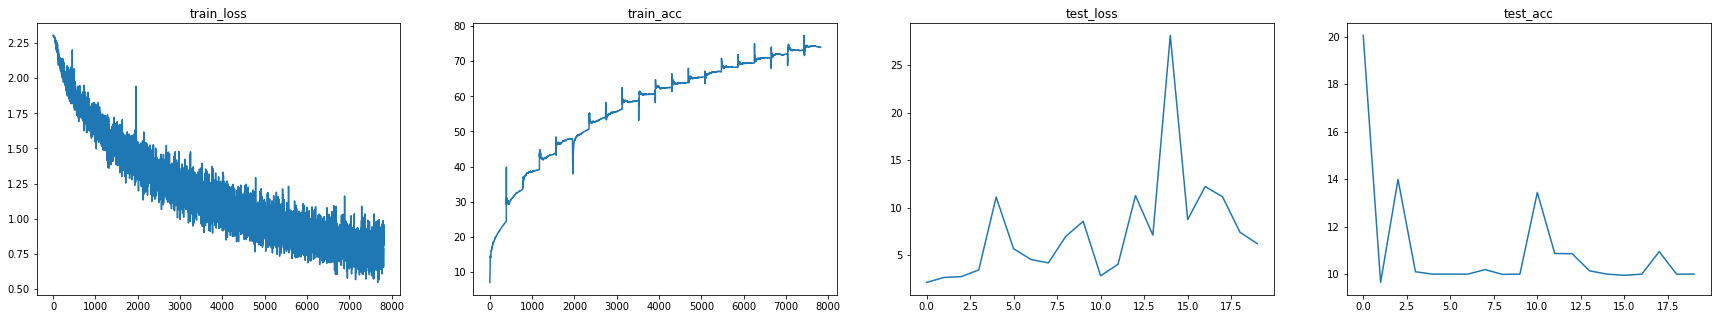

In [27]:
plot_results(train_losses,train_acc,test_losses,test_acc)

In [21]:
model = Net(is_GBN=True, gbn_splits=2, in_c = in_channels,n1=16,n2=32,n3=128,n4=256,grp=64)
model.load_state_dict(torch.load(model_path))

<All keys matched successfully>

In [22]:
test_images,target_labels,target_predictions = get_misclassified_images(model, test_dataloader)

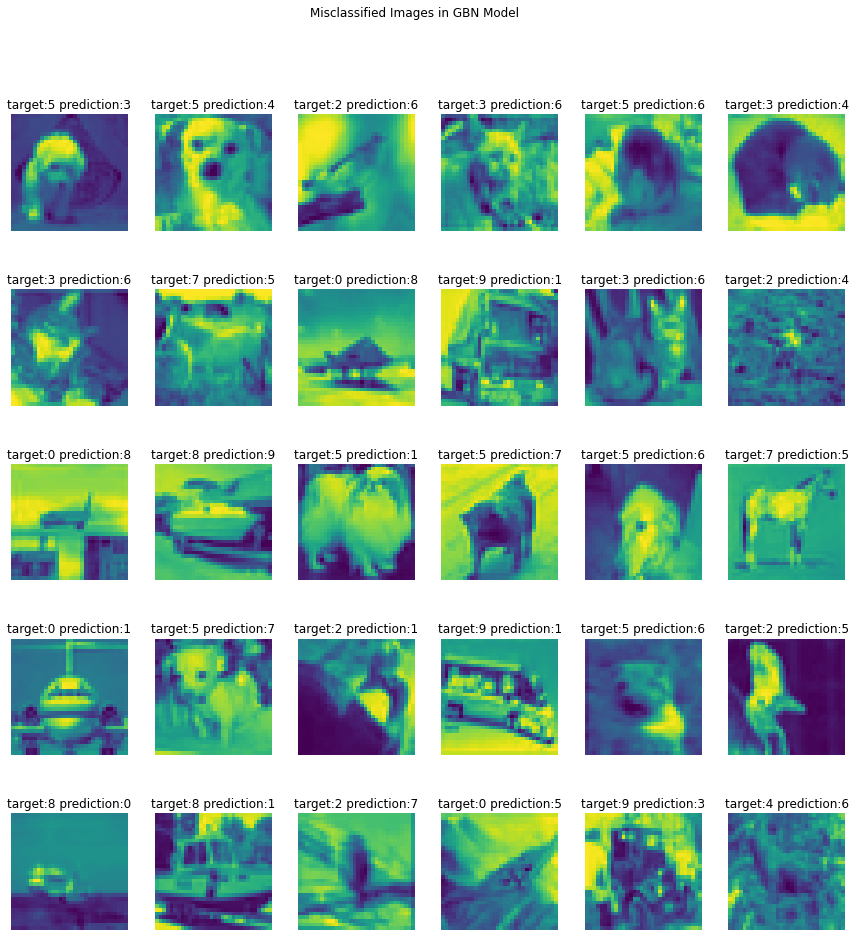

In [23]:
show_misclassified_images(test_images,target_labels,target_predictions,nrow=5, ncol=6)